In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Read images

(484, 269, 3)

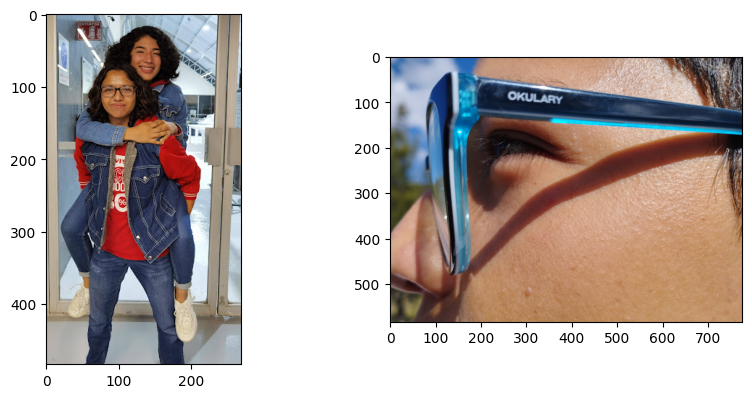

In [2]:
fig = plt.figure(figsize=(10,10))

tattoo = cv2.imread("../../data/Us.jpg")
o = fig.add_subplot(2,2,1)
tattoo = tattoo[100:, :]
o.imshow(cv2.cvtColor(tattoo, cv2.COLOR_BGR2RGB))

skin = cv2.imread("../../data/Me.jpg")
a = fig.add_subplot(2,2,2)
a.imshow(cv2.cvtColor(skin, cv2.COLOR_BGR2RGB))
tattoo.shape

## Preview

(484, 269, 3)


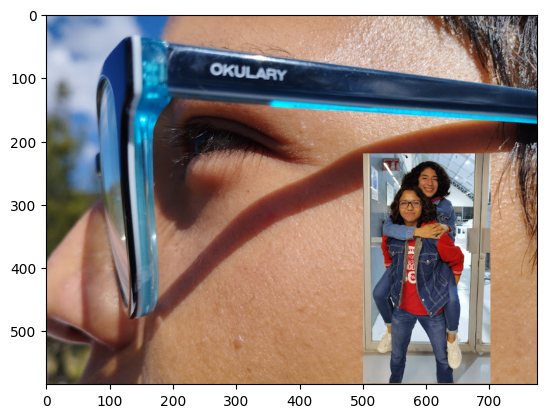

In [3]:
print(tattoo.shape)
s = 0.75
dim = np.array([tattoo.shape[1]*s, tattoo.shape[0]*s])
dim = dim.astype(int)

p = cv2.resize(tattoo, dim)
x, y = 500, 220
skin[y :p.shape[0] + y, x :p.shape[1] + x] = p
plt.imshow(cv2.cvtColor(skin, cv2.COLOR_BGR2RGB))


## Design tattoo

(484, 269)

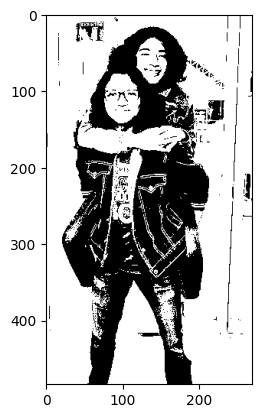

In [4]:
x = 80
mask = cv2.cvtColor(tattoo, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(mask, x, x, cv2.THRESH_BINARY)
mask = mask/x*255
plt.imshow(mask, cmap = "gray")
mask.shape

(484, 269, 3)


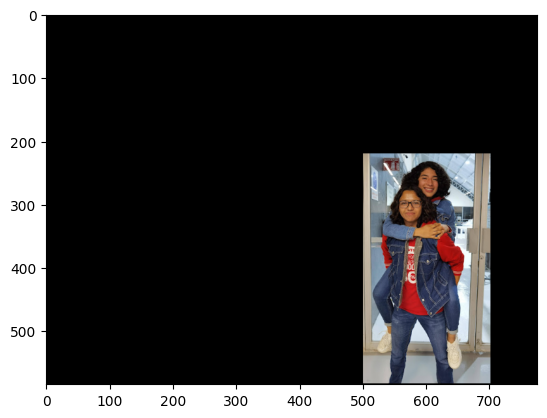

In [5]:
print(tattoo.shape)
s = 0.75
dim = np.array([tattoo.shape[1]*s, tattoo.shape[0]*s])
dim = dim.astype(int)

tattoo = cv2.resize(tattoo, dim)
x, y = 500, 220
back = np.zeros_like(skin)
back[y :tattoo.shape[0] + y, x :tattoo.shape[1] + x] = tattoo
tattoo = np.copy(back)

plt.imshow(cv2.cvtColor(back, cv2.COLOR_BGR2RGB))


(584, 776)


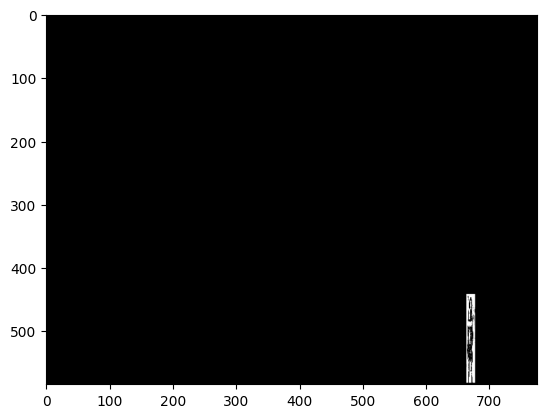

In [12]:
print(mask.shape)
mask = cv2.resize(mask, dim)
back = np.zeros((skin.shape[0], skin.shape[1]))
back[y :mask.shape[0] + y, x :mask.shape[1] + x] = mask
mask = np.copy(back)
plt.imshow(mask, cmap = "gray")

In [14]:
nLevels = 5

In [15]:
# generate Gaussian pyramid for A
s = np.copy(skin)
gpSkin = [s]
for i in range(nLevels):
    s = cv2.pyrDown(s)
    gpSkin.append(s)

In [ ]:
# generate Gaussian pyramid for A
t = np.copy(tattoo)
gpSkin = [s]
for i in range(nLevels):
    s = cv2.pyrDown(s)
    gpSkin.append(s)

# NO TRESPASSING

In [7]:
"""
k = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
mask = cv2.dilate(mask, k, iterations=1)
#tattoo = cv2.dilate(tattoo, k, iterations=1)
plt.imshow(mask, cmap = 'gray')
"""

"\nk = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])\nmask = cv2.dilate(mask, k, iterations=1)\n#tattoo = cv2.dilate(tattoo, k, iterations=1)\nplt.imshow(mask, cmap = 'gray')\n"

In [8]:
"""
#mask = tattoo.astype(int)
tatto = mask.astype(int)*255
plt.imshow(tattoo, cmap = "gray")
"""

'\n#mask = tattoo.astype(int)\ntatto = mask.astype(int)*255\nplt.imshow(tattoo, cmap = "gray")\n'

### Downsample image

In [9]:
"""
def downsample(img):
    return cv2.pyrDown(img)

little = downsample(orange)
plt.imshow(cv2.cvtColor(little, cv2.COLOR_BGR2RGB))
plt.show()
"""

'\ndef downsample(img):\n    return cv2.pyrDown(img)\n\nlittle = downsample(orange)\nplt.imshow(cv2.cvtColor(little, cv2.COLOR_BGR2RGB))\nplt.show()\n'

### Mask

In [10]:
"""
mask = np.ones((orange.shape))
mask[:, orange.shape[1] // 2:] = 0
plt.imshow(mask, cmap = "gray")
"""

'\nmask = np.ones((orange.shape))\nmask[:, orange.shape[1] // 2:] = 0\nplt.imshow(mask, cmap = "gray")\n'